In [4]:
import cv2
import os
import matplotlib.pyplot as plt

In [1]:
def trunc_vid():
    for option in ['train', 'val', 'test']:
        with open('./YouCookII/splits/' + option + '_list.txt', 'r') as f:
            vids = f.readlines()
        trunc_train = ''
        for vid in vids:
            if vid[0] == '1':
                trunc_train += vid
        with open('./YouCookII/splits/' + option + '_trunc_list.txt', 'w') as f:
            f.write(trunc_train)

In [2]:
trunc_vid()

In [5]:
def get_frame(vid_path, vid_name, seconds):
    cap = cv2.VideoCapture(os.path.join(vid_path, vid_name))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_id = int(fps * seconds)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
    res, frame = cap.read()
    return cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [18]:
frame = get_frame('./YouCookII/raw_videos/testing/101', 'YSes0R7EksY', 304)

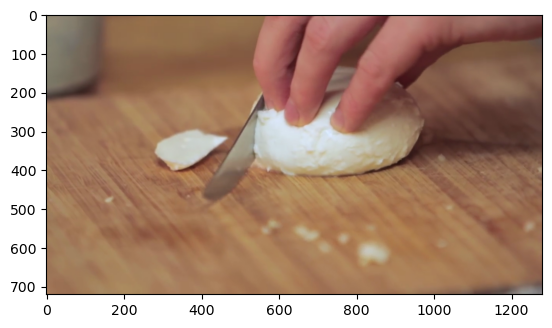

In [20]:
plt.imshow(frame)

In [10]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


max_length = 20
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(model, inp_images):
    images = []
    for i_image in inp_images:
        images.append(i_image)

    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds


# predict_step(['doctor.e16ba4e4.jpg']) # ['a woman in a hospital bed with a woman in a hospital bed']

In [21]:
captions = predict_step(model, [frame])

(-0.5, 1279.5, 719.5, -0.5)

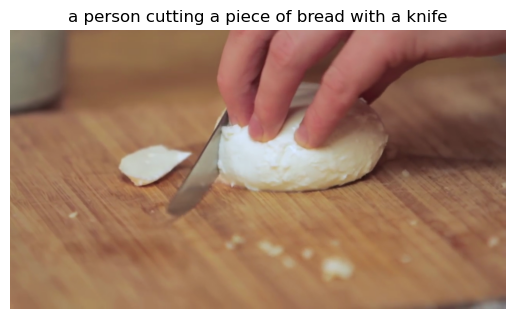

In [23]:
plt.imshow(frame)
plt.title(captions[0])
plt.axis('off')